### Obesity - Classification

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import matplotlib.cm as cm 
import plotly.express as px

In [37]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* Gender : Male or Female
* Age : Age of the person
* Height : Height in "meter"
* Weight : Weight in "kilogram"
* family_history_with_overweight : if parents/family with obesity
* FAVC : Frequent consumption of high caloric food
* FCVC : Frequency of consumption of vegetables
* NCP : Number of main meals (per day)
* CAEC : Consumption of food between meals
* SMOKE : does the person smoke or not
* CH2O : Consumption of water daily
* SCC : Calories consumption monitoring
* FAF : Physical activity frequency (per week)
* TUE : Time using technology devices
* CALC : Alcool consumption
* MTRANS : what kind of transportation taken
* NObeyesdad : level of obesity

###  Displays the data:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS and NObeyesdad are textual attributes.<br> We will handle with them soon.

In [39]:
#Other than 'Age', 'Weight' and 'Height' there is no reason for the other numeric columns to be 'float'. We'll change it.
columns = ["NCP", "CH2O", "TUE", "FAF","FCVC"]
for col in columns:
    df[col] = round(df[col]).astype('int')
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight


In [40]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Our target column is the "NObeyesdad" column, the column has 6 different values of weight definition.<br> Only people defined as "Obesity_Type_I" and above, will be considered 'obese'.
* Insufficient_Weight
* Normal_Weight
* Overweight_Level_I
* Overweight_Level_II
* Obesity_Type_I
* Obesity_Type_II
* Obesity_Type_III

We can see from the graph below that about half of the people in the data are defined as obese

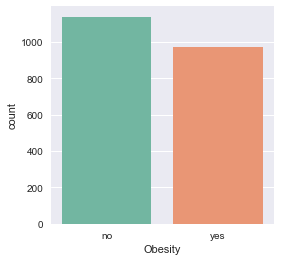

In [41]:
obese = []
for elem in df['NObeyesdad']:
    obese.append('yes') if 'Obesity' in elem else obese.append('no')
df['Obesity'] = obese
plt.figure(figsize=(4,4))
sns.countplot(x=df['Obesity'], data=df,  palette="Set2")
df.drop(columns=['Obesity'],inplace=True)
plt.show()

## Ploting the data:

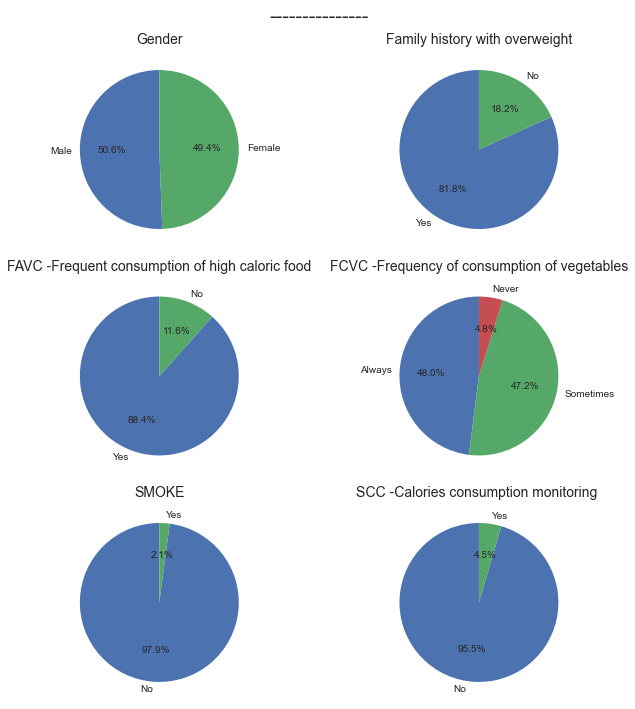

In [42]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
plt.style.use('seaborn')
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax
ax1.pie( df['Gender'].value_counts(), labels=['Male','Female'], startangle=90, autopct='%1.1f%%')
ax1.set_title("Gender",fontdict={'fontsize': 14})
ax2.pie( df['family_history_with_overweight'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax2.set_title("Family history with overweight",fontdict={'fontsize': 14})
ax3.pie( df['FAVC'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax3.set_title("FAVC -Frequent consumption of high caloric food",fontdict={'fontsize': 14})
ax4.pie( df['FCVC'].value_counts(), labels=['Always','Sometimes','Never'], startangle=90, autopct='%1.1f%%')
ax4.set_title("FCVC -Frequency of consumption of vegetables",fontdict={'fontsize': 14})
ax5.pie( df['SMOKE'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax5.set_title("SMOKE",fontdict={'fontsize': 14})
ax6.pie( df['SCC'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax6.set_title("SCC -Calories consumption monitoring ",fontdict={'fontsize': 14})
fig.suptitle("---------------", fontsize=20)
plt.tight_layout()
plt.show()

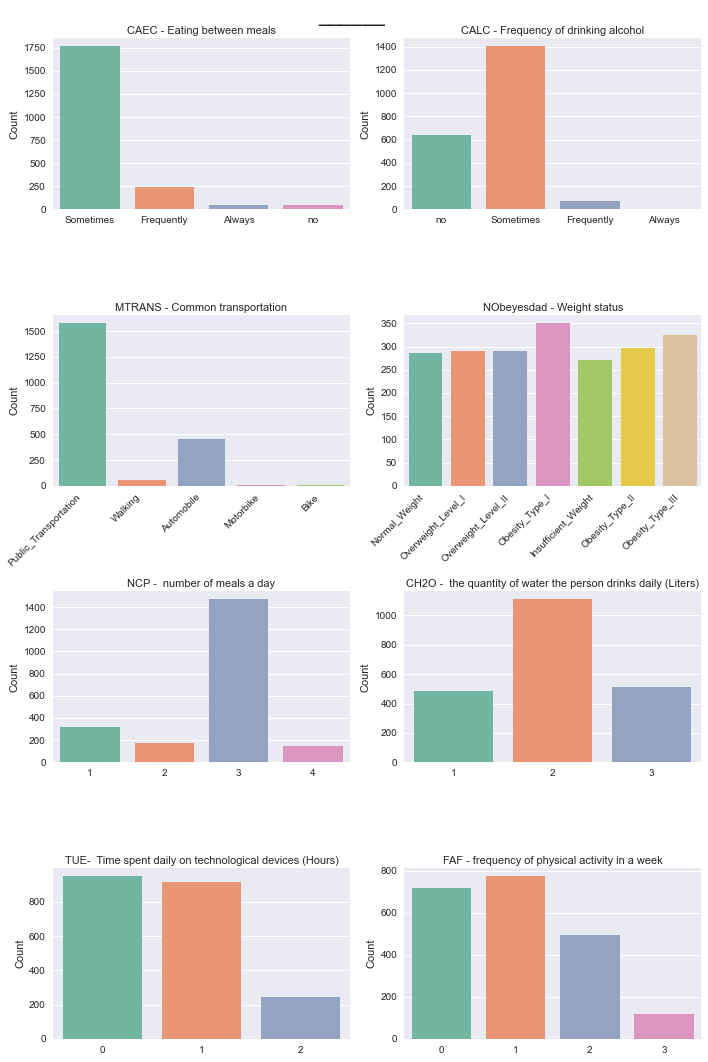

In [43]:
columns = ['CAEC','CALC', 'MTRANS', 'NObeyesdad','NCP', 'CH2O', 'TUE', 'FAF']
labels=['CAEC - Eating between meals','CALC - Frequency of drinking alcohol', 'MTRANS - Common transportation', 'NObeyesdad - Weight status',
       'NCP -  number of meals a day', 'CH2O -  the quantity of water the person drinks daily (Liters)', 'TUE-  Time spent daily on technological devices (Hours)', 'FAF - frequency of physical activity in a week']
count=0
fig, ax = plt.subplots(4,2, figsize=(10, 15))
for col, subplot in zip(columns, ax.flatten()):
    if col=="MTRANS" or col=="NObeyesdad":
        chart = sns.countplot(x= df[col],ax=subplot, palette="Set2")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    else:
        sns.countplot(x= df[col],ax=subplot, palette="Set2")  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    count+=1
    
fig.suptitle("______", fontsize=20)
plt.tight_layout()
plt.show()

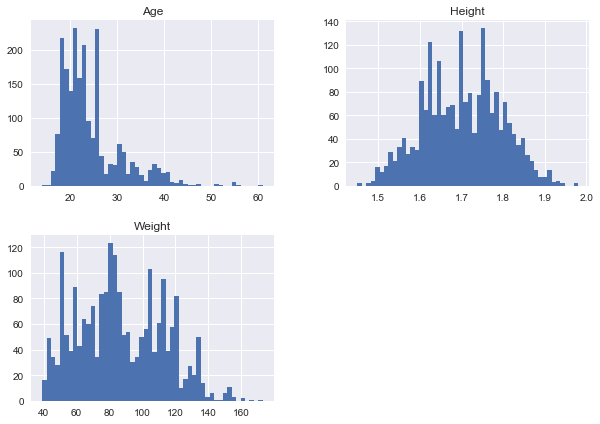

In [44]:
df[["Age", "Height", "Weight"]].hist(bins=50, figsize=(10, 7))
plt.style.use('seaborn')
plt.show()

Before we get to the models we want to change the categorial attribute to numeric values.<br>
We will use "get_dummies" to change some of the columns.<br>
Other columns (which have numerical values) like the amount of meals per day or The amount of drinking water (liters) per day,<br>
we will leave as numbers because there is meaning to the ratio between them.

In [45]:
df_copy = df.copy(deep ='True')
df_res = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'])
df_res['CAEC'] = df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2 ,'Always':3})
df_res['CALC'] = df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2 ,'Always':3})
df_res['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2 ,
                                             'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
df_res.head(3)

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2,3,1,2,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,21.0,1.52,56.0,3,3,1,3,3,0,1,...,0,0,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2,3,1,2,2,1,2,...,0,1,0,1,0,0,0,0,1,0


We have many features. We would like to check the correlation that each of them has with the "NObeyesdad" column.<br>
Therefore, we will first check the correlations of each column with the "NObeyesdad" column.<br>
Then we will check the correlations of the columns that had a very high or very low correlation.

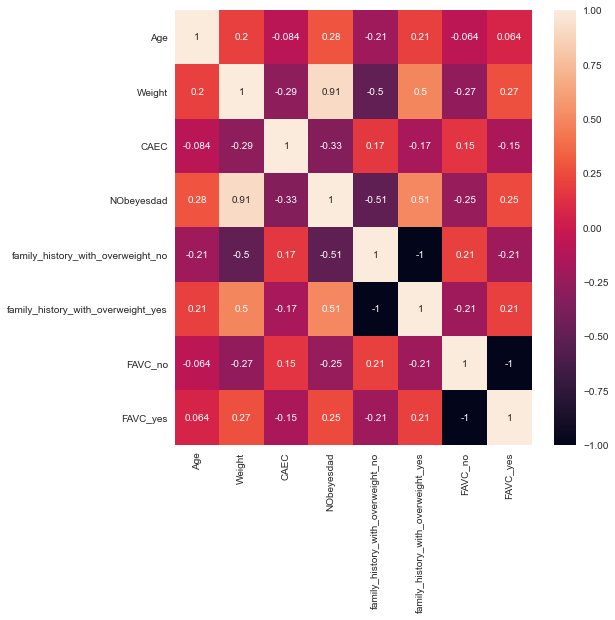

In [46]:
cor_df = df_res.copy(deep=True)
for (index, col) in enumerate(cor_df):
     if (df_res['NObeyesdad'].corr(df_res[col])) <0.2 and (df_res['NObeyesdad'].corr(df_res[col])) >- 0.2:
         cor_df.drop(columns=col,inplace=True)
#cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor_df.corr(), annot=True)
plt.show()

From the CorrMatrix we can infer that 'Weight' and 'family history with overweight'  have the highest correlation.


In [47]:
# Weight is highly correlated and is directly correlate to the BMI calc used for the target
# Remove Weight
df_res = df_res.drop(columns=['Weight'])

In [49]:
# We 
from sklearn.model_selection import train_test_split
X = df_res.drop(columns=["NObeyesdad"])
y = df_res['NObeyesdad'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)